In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [201]:
data = pd.read_csv('test.csv')
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [202]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [203]:
data.shape

(300, 2)

In [204]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


# splitting data so as to train then test it

In [205]:
train_input = np.array(data.x[0:200]).reshape(200,1)
train_output = np.array(data.y[0:200]).reshape(200,1)

test_input = np.array(data.x[200:300]).reshape(100,1)
test_output = np.array(data.y[200:300]).reshape(100,1)

test_input.shape


(100, 1)

In [206]:
train_input.shape

(200, 1)

In [207]:
train_output.shape

(200, 1)

In [208]:
test_input.shape

(100, 1)

In [209]:
test_output.shape

(100, 1)

# Training the data

     Sequence to follow
       *Forward propagation
       *cost function
       *Backward propagation
       *Update the parameters

forward Propagation -> 
y = m*x + c where m and c are the parameters our model will learn through training

In [210]:
def forward_propagation(train_input,parameters):
    m = parameters['m']  
    c = parameters['c']
    
    predictions = np.multiply(m,train_input) + c
    return predictions

# Cost function

1/2n(y1-y)**2      
n -> number of data entered into the model     
y1 -> output that was predicted      
y -> is the output that was meant for training   

In [211]:
def cost_function(predictions, test_output):
    cost = np.mean((predictions-test_output)**2) * 0.5
    return cost

# Gradient Descent for Backpropagation

    using chain rule
     *cost
     *f=f(x)
     
     partial derivetives for cost funtion w.r.t m dcost/dm = dcost/df *df/dm
      
     partial derivetives for cost funtion w.r.t c dcost/dc = dcost/df *df/dc
     
     *partial derivatives*
     
     *dcost/df = (f-y)
     *df/dm = x
     *df/dc = 1
     

In [212]:
def backward_propagation(train_input,predictions,train_output):
    derivatives = dict()
    
    predictions = predictions.reshape(-1, 1)
    train_output = train_output.reshape(-1, 1)
    
    df = predictions-train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives
    


# Updating the Parameters

     m = m-(learning_rate*dm)    
     c = c-(learning_rate*dc)

In [213]:
def updating_parameters(parameters,derivatives,learning_rate):
    parameters['m'] =  parameters['m'] - learning_rate* derivatives['dm']   
    parameters['c'] =  parameters['m'] - learning_rate* derivatives['dc']
     
    return parameters

# Training


In [214]:
def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1) * -1
    parameters['c'] = np.random.uniform(0, 1) * -1
    
    plt.figure()
    
    loss = list()
    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        
        plt.plot(train_input, train_output, '+', label='original')
        plt.plot(train_input, predictions, '*', label='training')
        
        plt.legend()
        
        plt.show()
        
        derivatives = backward_propagation(train_input, predictions, train_output)
        
        parameters = updating_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss,  cost


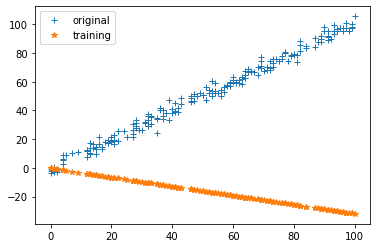

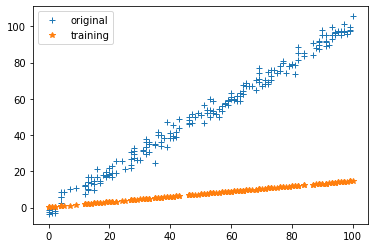

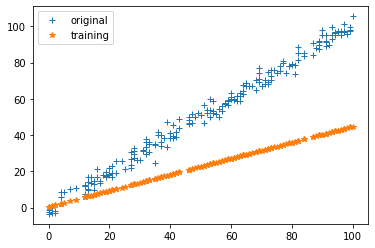

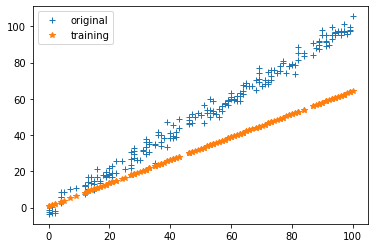

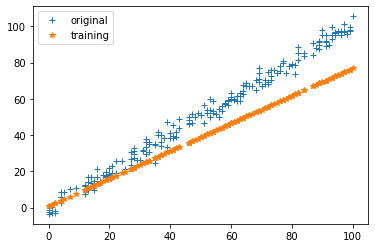

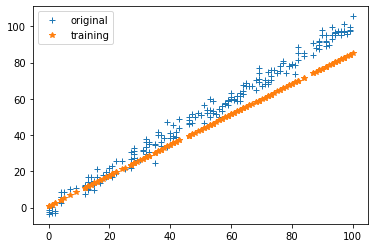

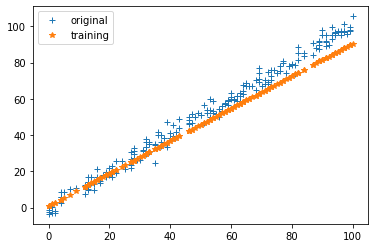

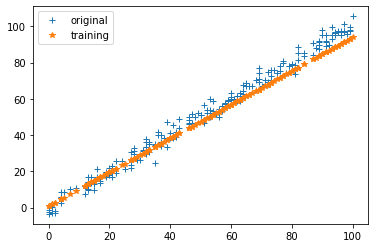

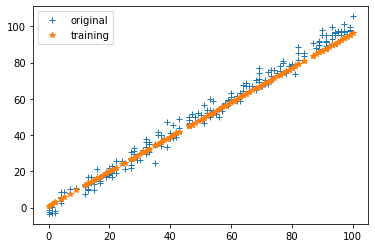

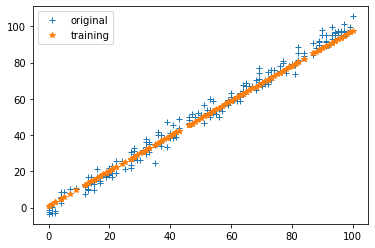

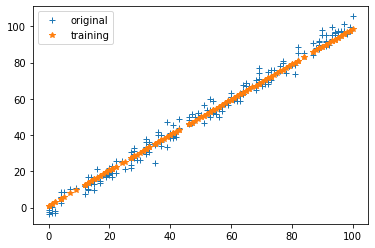

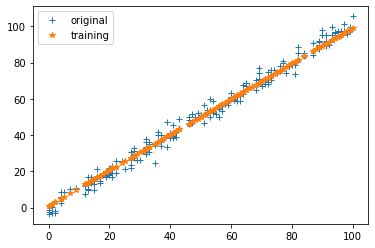

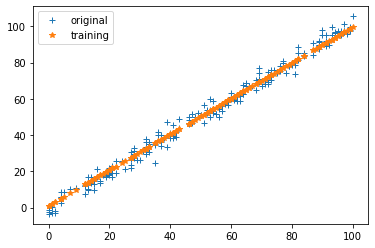

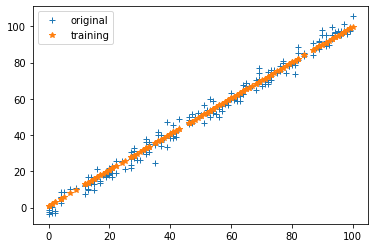

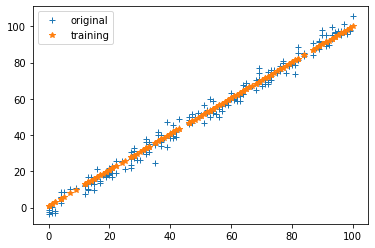

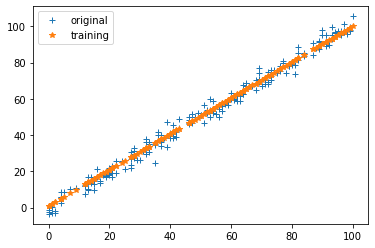

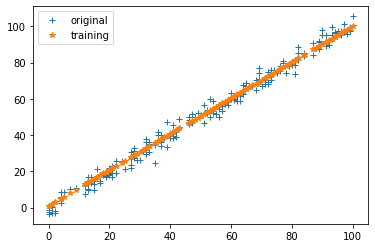

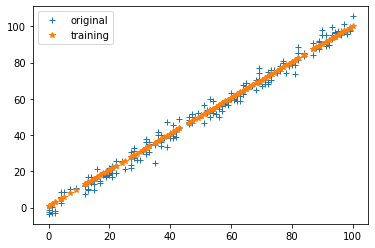

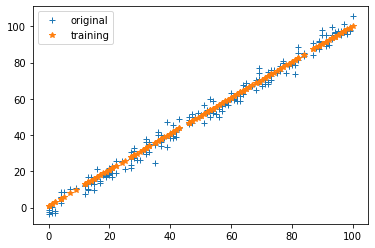

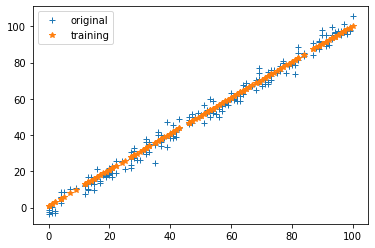

In [215]:
parameters,loss, cost = train(train_input, train_output, 0.0001, 20)

In [216]:
cost


4.857845899158552